In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

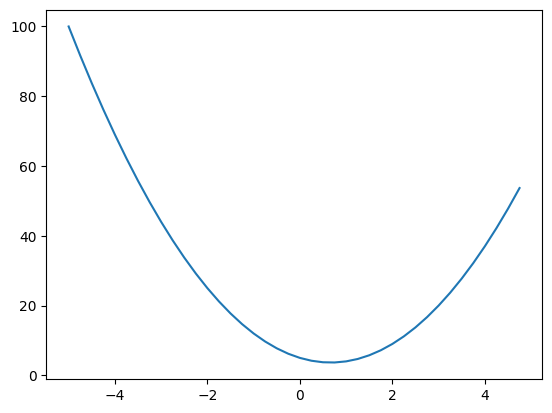

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs) #Numpy arrays vectorizes the fun, so the func applied to the entire elements of the array at once, 
# instead of looping through elemetns like in normal Python list
plt.plot(xs, ys)

## FINDING THE DERIVATIVE USING LIMIT RULE

In [5]:
# if we slightly increase values of x at some point of x by a small number h, 
# how does the function respond
h=0.00000001
x = 3.0
(f(x+h) - f(x))/h #how much did the func change, when we changed x by a small value
# this is the slope at 3

14.00000009255109

In [6]:
# if we slightly increase values of x at some point of x by a small number h, 
# how does the function respond
h=0.00000001
x = -3.0
(f(x+h) - f(x))/h #how much did the func change, when we changed x by a small value
# this is the slope at -3

-22.00000039920269

In [7]:
h=0.00000001
x = 2/3
(f(x+h) - f(x))/h  # at x=2/3 the slope is 0
# so this means at this point of x, if slightly increase x the function doesnt repsond, it stays the same

0.0

In [8]:
# derivarive of a func with multiple inputs
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [9]:
h = 0.0001
#inputs
a = 2.0
b = -3.0
c = 10.0

# derivate of func d wrt input a
d1 = a*b + c
a += h
d2 = a*b + c

print('d1',d1)
print('d2', d2)
print('slope',(d2-d1)/h) 
# The slope is 3
# if you manullay diff a*b+c wrt a we get b and value of b is -3

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [10]:
#similarly derivative of func d wrt b
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
b += h
d2 = a*b + c

print('d1',d1)
print('d2', d2)
print('slope',(d2-d1)/h) 
#Slope is 2
# diff a*b+c wrt b is a and a is 2

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [11]:
#similarly derivative of func d wrt b
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
c += h
d2 = a*b + c

print('d1',d1)
print('d2', d2)
print('slope',(d2-d1)/h) 
#Slope is 1
# that means func changes by exact amount of what we change to c (i.e h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


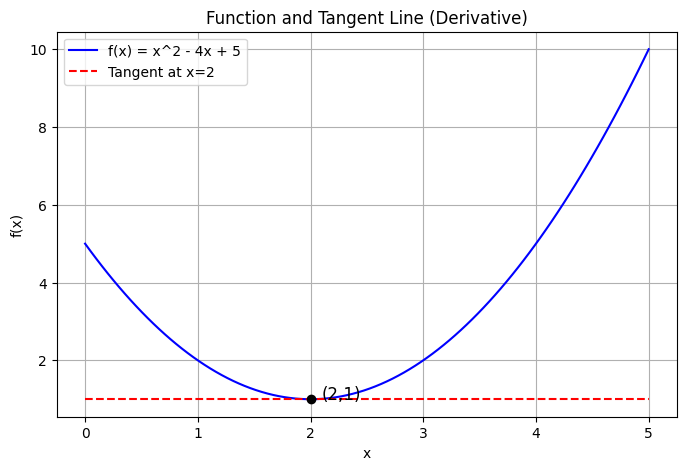

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def f(x):
    return x**2 - 4*x + 5

# Derivative of the function
def f_prime(x):
    return 2*x - 4

# x values
xs = np.linspace(0, 5, 100)
ys = f(xs)

# Point to visualize derivative
x0 = 2
y0 = f(x0) 
slope = f_prime(x0) 
tangent = slope*(xs - x0) + y0
 

# Plot
plt.figure(figsize=(8,5))
plt.plot(xs, ys, label='f(x) = x^2 - 4x + 5', color='blue')
plt.plot(xs, tangent, label=f'Tangent at x={x0}', color='red', linestyle='--')
plt.scatter(x0, y0, color='black', zorder=5)
plt.text(x0+0.1, y0, f'({x0},{y0})', fontsize=12)
plt.title('Function and Tangent Line (Derivative)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Creating the core 'Value' object abd its visualization

In [39]:
class Value:
    def __init__(self, data, _children = (), _op= '', label = ''): 
        #data is a single simple scalar value, 
        #'_children' is to build the expression graph which stores all the child Values from which the new Va'lue will be created
        # _op is the operator used to create this Value
        # label is the label used to visualise the expression graph
        self.data = data
        self.grad = 0.0 # its the derivative of final value L, w.r.t to the current Value
        # grad= 0 means, there is no effect,
        # at initialization, we assume every Value doesnot affect the output L
        
        self._prev = set(_children) #_childern is a tuple, but in class we save it as prev which is a set for efficiency
        self._op = _op
        self.label = label
        
    def __repr__(self): # special method in PYthon, that defines the “official” string representation of an object.
        return f"Value(data= {self.data})"
        
    def __add__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data + other.data, (self, other),'+')
        return out
        
    def __mul__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data * other.data, (self, other),'*')
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh') # the children of this new Value is it itself
        return out
        

In [14]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
print(a+b) # python internally calls a.__add__(b)
print(a*b)

print(a*b + c) # internally calls (a.__mul__(b)).__add__(c)

Value(data= -1.0)
Value(data= -6.0)
Value(data= 4.0)


In [15]:
e = a*b; e.label = 'e'
d = e+c; d.label='d'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data= -8.0)

In [16]:
d

Value(data= 4.0)

In [17]:
d._prev

{Value(data= -6.0), Value(data= 10.0)}

In [18]:
a._prev

set()

In [19]:
d._op

'+'

In [20]:
pip install graphviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Now we need to visualize the expression graph

from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'}) # LR = Left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, crteat a rectangular ('record') node for it
        dot.node(name = uid, label = "%s | {data %.4f | grad %.4f }"% (n.label,n.data, n.grad ), shape = 'record')

        if n._op:
            #if this value is a result of some operation, create an op node for it
            dot.node(name = uid+n._op, label = n._op)
            #and connect this node to it
            dot.edge(uid+n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)
    return dot

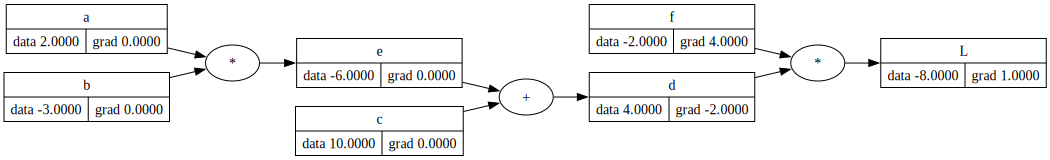

In [26]:
draw_dot(L) # we visualize the edxpression graph taking d as root

In [39]:
# grad is basically the derivative of output(L) w.r.t to each Value

## Manual Backpropogation

In [23]:
L = d * f
dL/dd = ? from calculus it is f
similalrly dL/df = d

SyntaxError: cannot assign to expression (1222682682.py, line 2)

In [24]:
f.grad = 4 # which is the value of d
d.grad = -2.0 # which is the value of f

In [25]:
L.grad = 1.0 # derivative of L w.r.t L is 1

In [56]:
# function to calcualte derivatives using fomrula
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label='d'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label='d' # gives dL/dd which is -2
    d.data += h
    f = Value(-2.0, label = 'f')  #f = Value(-2.0+ h, label = 'f') (TO FIND dL/df which gives 4)
    L = d*f; L.label = 'L'
    L2 = L.data # L2 = L.data + h (to find dL/dL)

    print((L2 - L1)/h)
lol()

# derivative of L w.r.t L is 1

-1.9999999999953388


In [ ]:
Now is the crux of backpropogation
we need to find dL/dc, we use the chain rule of calculus here
we know dL/dd, also how c impacts d

so using calculus, we first find dd/dc
dd/dc? (THIS IS THE LOCAL DERIVATIVE)
d=c+e --> so dd/dc =  is 1.0 numercial proof below
similarly dd/de = 1.0

Now, to find dL/dc we use chain rule
WANT:
dL/dc

KNOW:
dL/dd and dd/dc

so dL/dc = (dL/dd) * (dd/dc)

SO, refer next cell

PROOF
(f(x+h)-f(x)/h)
((c+h+e) - (c+e))/h
(c+h+e-c-e)/h
1.0

In [27]:
c.grad = -2.0 * 1.0 #(dL/dc = dL/dd * dd/dc)
e.grad = -2.0 * 1.0 #(dL/de = dL/dd * dd/de)
# THis also means, the gradient of d is routed to both of its children e and c

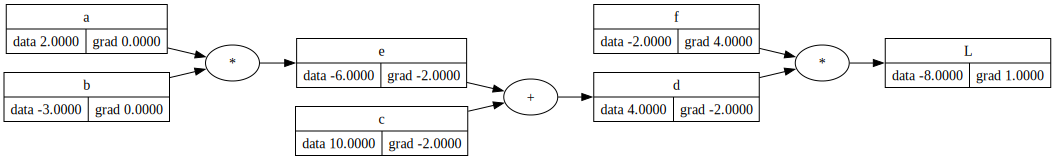

In [28]:
draw_dot(L)

In [64]:
# function to calcualte derivatives using fomrula
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label='d'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    # c.data += h to find dL/dc
    e = a*b; e.label = 'e'
    e.data += h # to find dL/de
    d = e+c; d.label='d' # gives dL/dd which is -2
    f = Value(-2.0, label = 'f')  #f = Value(-2.0+ h, label = 'f') (TO FIND dL/df which gives 4)
    L = d*f; L.label = 'L'
    L2 = L.data # L2 = L.data + h (to find dL/dL)

    print((L2 - L1)/h)
lol()



-2.000000000000668


In [ ]:
# Now recurse backawards and again apply chain rule to find gradients of a and b
KNOW:
dL/de = -2.0
e = a*b
de/da = b
WANT:
dL/da = (dL/de) * (de / da)


So refer next cell


In [29]:
a.grad = -2.0 * -3.0 #((dL/de) * b) because de/da = b
b.grad = -2.0 * 2.0 # ((dL/de) * a) because de/db = a

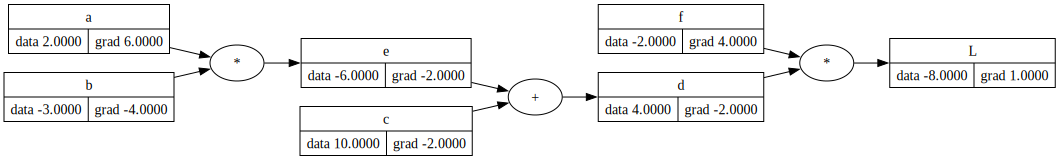

In [30]:
draw_dot(L)

In [73]:
# function to calcualte derivatives using fomrula
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label='d'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    # a.data += h #(to find dL/da)
    b = Value(-3.0, label='b')
    b.data += h # to find dL/db
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label='d' 
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1)/h)
lol()



-3.9999999999995595


In [74]:
# lets see this in action
# we nudge different values and check how L is changed
# we change the values in the direction of gradient (bcoz we multiply with .grad), so the function should increase in +ve direction
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#forward pass
e = a*b
d = e+c
L = d*f

print(L.data)
# So L moved in a positive direction from -8 to -7.286

-7.286496


## Manual Backpropo through a neuron


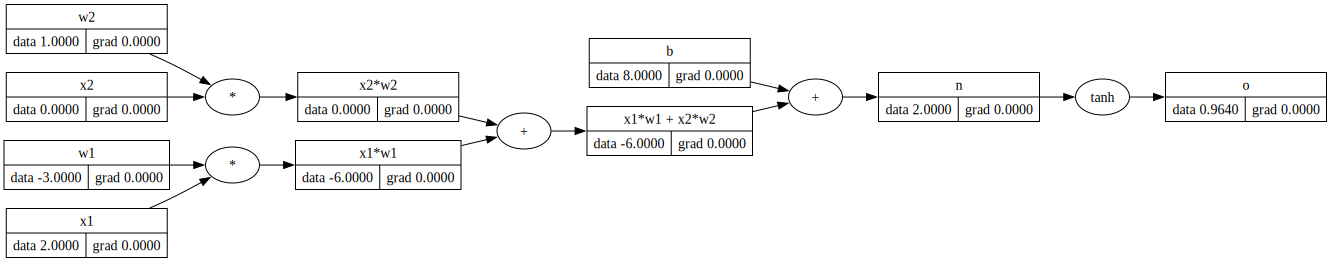

In [42]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(8, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

#now we add an activation fun to the nueron to get the output of the neruon
# TODO define tanh function in Value class
o = n.tanh();o.label = 'o'

draw_dot(o)
#notice how tanh squashes a big output (2) into within -1,1

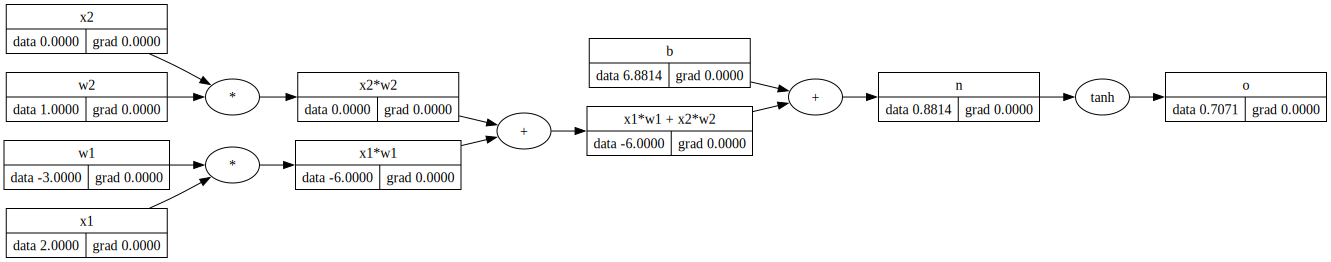

In [43]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

#now we add an activation fun to the nueron to get the output of the neruon
# TODO define tanh function in Value class
o = n.tanh();o.label = 'o'

draw_dot(o)
#notice how tanh squashes a big output (2) into within -1,1

In [44]:
#we have defined forward pass and found out o
# now we do backpropo and fill out the gradients i.e the derivate of o w.r.t to all the inputs
# note that this is just a single neuron, IRL we have thousands of these neurons in a NN and uses loss function
# that measures the accuracy of NN and we backpropogate w.r.t that accuracy and try to increase the accuracy


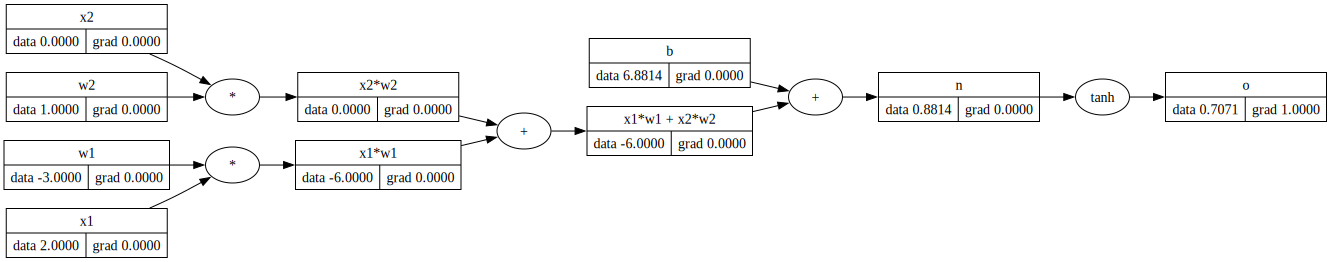

In [46]:
o.grad = 1
draw_dot(o)

In [47]:
# o=tanh(n)
# do/dn = 1- tanh(n)**2 and tanh(n)=o
1- o.data**2

0.4999999999999999

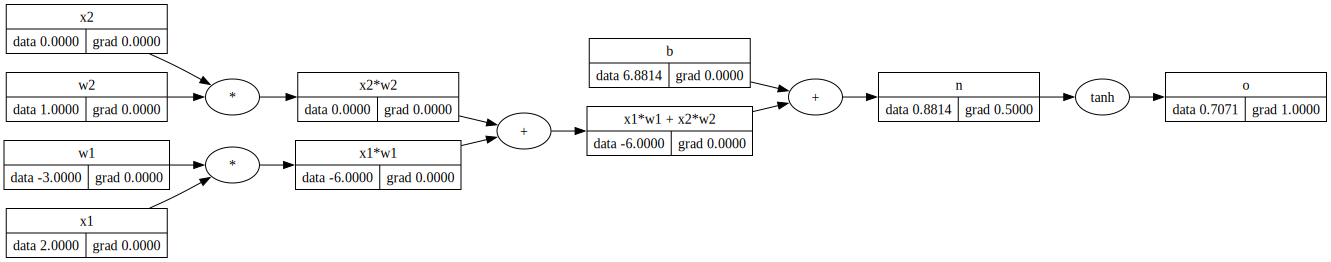

In [48]:
# so
n.grad = 0.5
draw_dot(o)

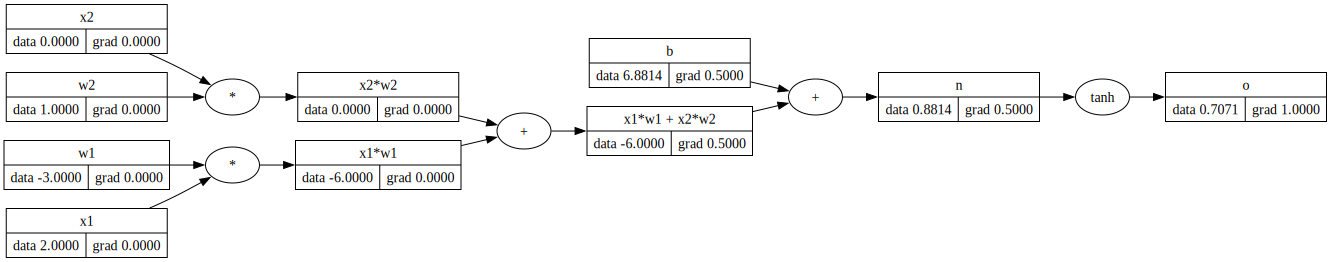

In [49]:
# A plus (+) is a distributor of a gradient. It distributes the gradient into its child nodes
x1w1x2w2.grad = 0.5
b.grad = 0.5
draw_dot(o)

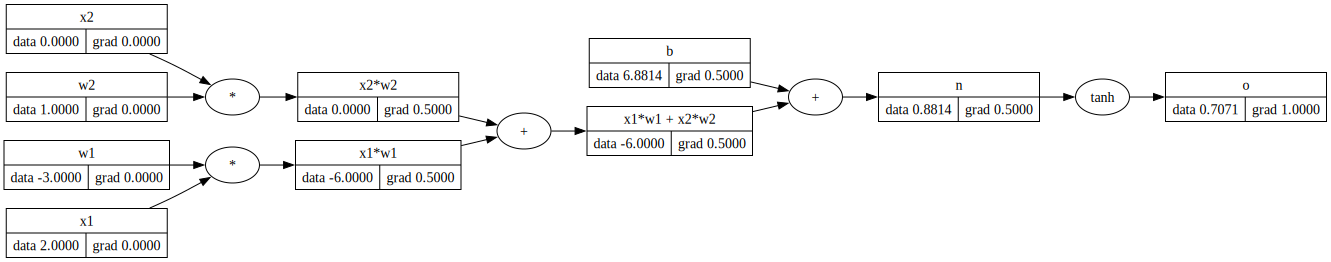

In [50]:
x1w1.grad = 0.5
x2w2.grad = 0.5
draw_dot(o)

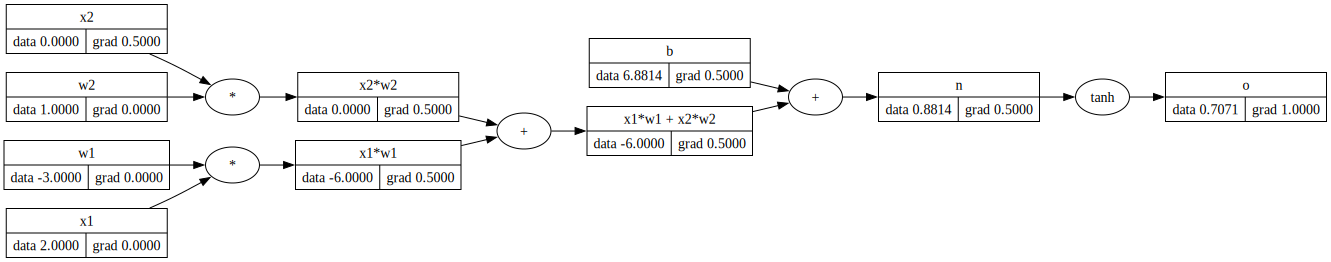

In [51]:
# a mult operation mean the local derivative would be the other child node
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
draw_dot(o)

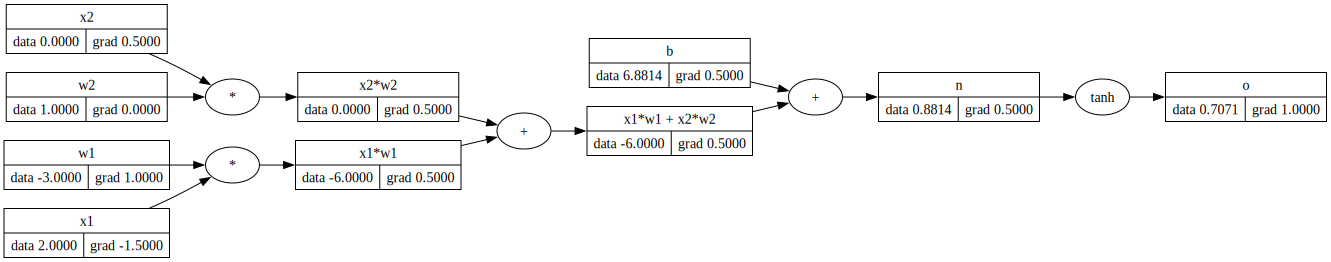

In [53]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
draw_dot(o)

In [ ]:
# Gradient of w2 is 0, that means the w doesn't have any influence in the output o....this makes sense because we 
# mulitply w2 with x2 whose value is 0

# also, if we increase w1, o also increases proportionally as gradient of w1 is 1

## More automatic backpropogation

In [16]:
class Value:
    def __init__(self, data, _children = (), _op= '', label = ''): 
        #data is a single simple scalar value, 
        #'_children' is to build the expression graph which stores all the child Values from which the new Va'lue will be created
        # _op is the operator used to create this Value
        # label is the label used to visualise the expression graph
        self.data = data
        self.grad = 0.0 # its the derivative of final value L, w.r.t to the current Value
        # grad= 0 means, there is no effect,
        # at initialization, we assume every Value doesnot affect the output L
        self._backward = lambda: None
        # this is a function to do the chain rule automatically (how we chain outputs gradient into inputs grdients)
        # by default its an empty func
        
        self._prev = set(_children) #_childern is a tuple, but in class we save it as prev which is a set for efficiency
        self._op = _op
        self.label = label
        
    def __repr__(self): # special method in PYthon, that defines the “official” string representation of an object.
        return f"Value(data= {self.data})"
        
    def __add__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data + other.data, (self, other),'+')
        def _backward():
            self.grad = 1.0 * out.grad #the local derivative of self in addition is 1
            other.grad = 1.0 * out.grad
        out._backward = _backward #this is the function that propogates the gradient
        return out
        
    def __mul__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data * other.data, (self, other),'*')
        def _backward():
            self.grad = other.data * out.grad #for mult. the local derivative will be the other term in the expression
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh') # the children of this new Value is it itself
        def _backward():
            self.grad = (1-t**2) * out.grad # local derivatie of tanh is 1-tanh2
        out._backward = _backward
        return out
        

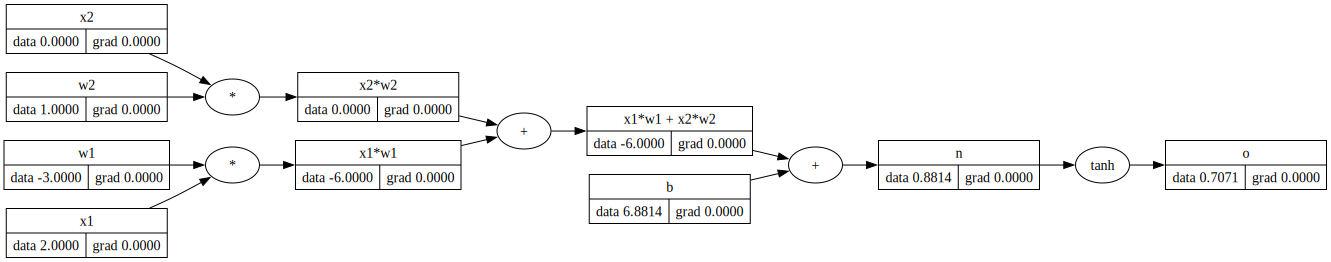

In [17]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

o = n.tanh();o.label = 'o'

draw_dot(o)
# Initially all gradients are 0

In [18]:
# now we dont have to do the backpropo manually we just need to call ._backward() from RIGHT TO LEFT order

# as a base case we need to set 
o.grad = 1.0



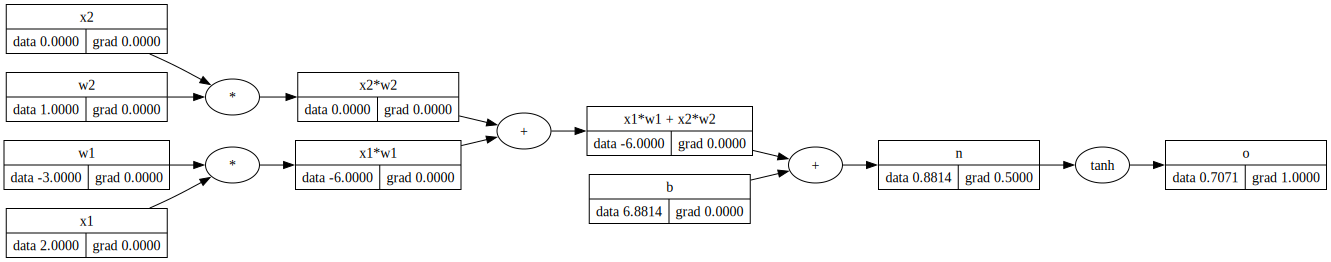

In [19]:
o._backward() #o was outcome of tanh(n)--> so this would give us do/dn

draw_dot(o)

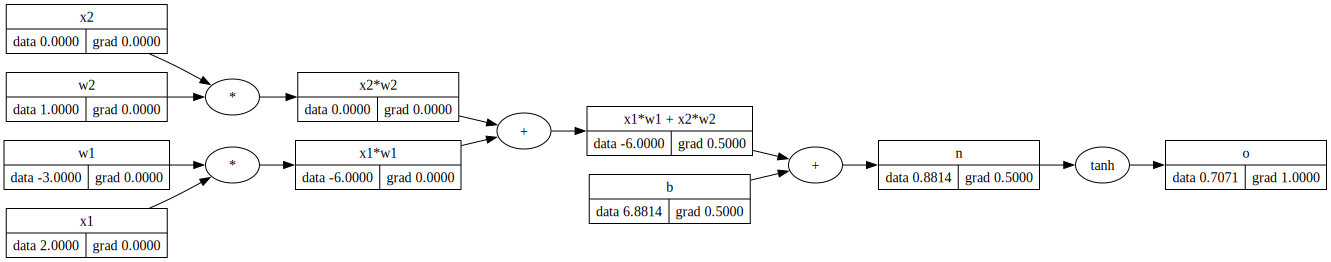

In [20]:
n._backward() # n is func of b and x1w1x2w2, so this gives gradient at these points

draw_dot(o)

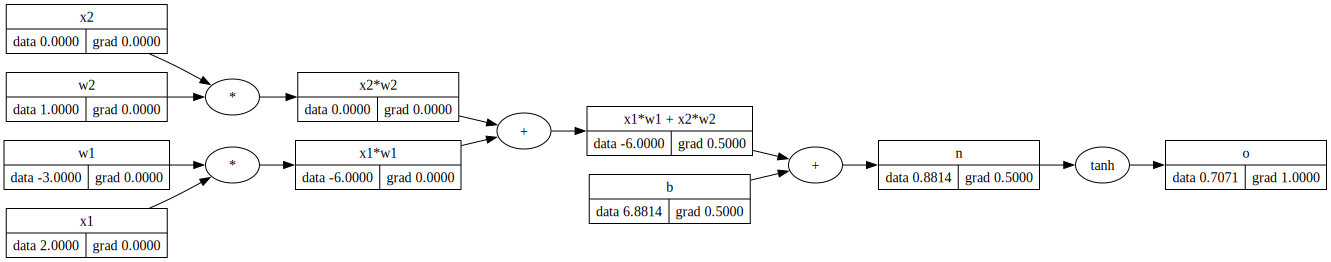

In [21]:
b._backward() # by initialisaiton b's _backward is an empty fun---> so nothing really happens

draw_dot(o)

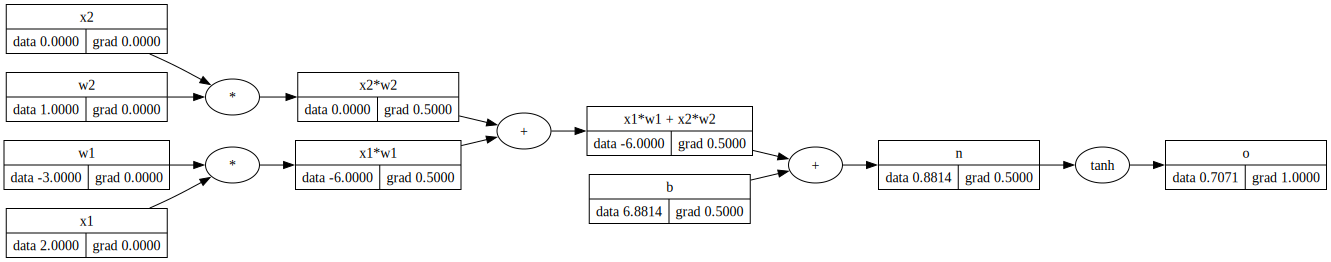

In [22]:
x1w1x2w2._backward()
draw_dot(o)

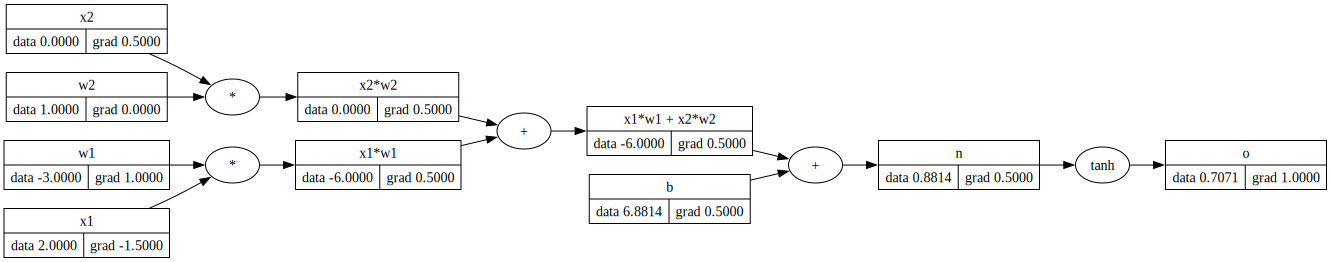

In [23]:
x2w2._backward()
x1w1._backward()

draw_dot(o)

## Making it more automatic by replacing manual calls of _backward

In [24]:
# we use topological sort to layout the graphs


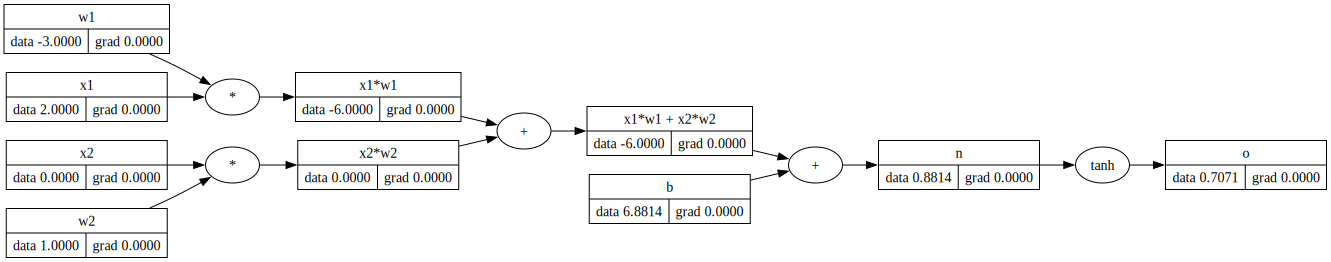

In [33]:
# RESTING THE GRADIENTS
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

o = n.tanh();o.label = 'o'

draw_dot(o)
# Initially all gradients are 0

In [34]:
# base case
o.grad = 1

In [35]:
# root node added to topo list only after all its children are added---> magic of recursive function
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data= -3.0),
 Value(data= 2.0),
 Value(data= -6.0),
 Value(data= 1.0),
 Value(data= 0.0),
 Value(data= 0.0),
 Value(data= -6.0),
 Value(data= 6.881373587019543),
 Value(data= 0.8813735870195432),
 Value(data= 0.7071067811865476)]

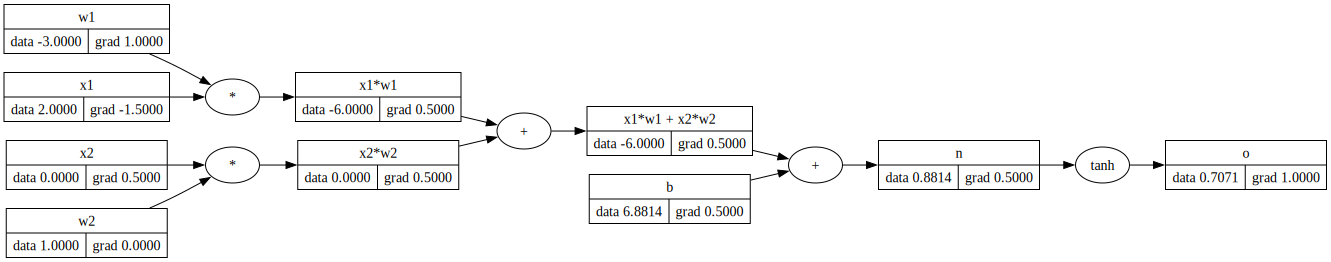

In [36]:
# now loop through topo in reverse order to go through the graph from R to L
for node in reversed(topo):
    node._backward()
draw_dot(o)

In [37]:
# Embed this functionality into Value class
class Value:
    def __init__(self, data, _children = (), _op= '', label = ''): 
        #data is a single simple scalar value, 
        #'_children' is to build the expression graph which stores all the child Values from which the new Va'lue will be created
        # _op is the operator used to create this Value
        # label is the label used to visualise the expression graph
        self.data = data
        self.grad = 0.0 # its the derivative of final value L, w.r.t to the current Value
        # grad= 0 means, there is no effect,
        # at initialization, we assume every Value doesnot affect the output L
        self._backward = lambda: None
        # this is a function to do the chain rule automatically (how we chain outputs gradient into inputs grdients)
        # by default its an empty func
        
        self._prev = set(_children) #_childern is a tuple, but in class we save it as prev which is a set for efficiency
        self._op = _op
        self.label = label
        
    def __repr__(self): # special method in PYthon, that defines the “official” string representation of an object.
        return f"Value(data= {self.data})"
        
    def __add__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data + other.data, (self, other),'+')
        def _backward():
            self.grad = 1.0 * out.grad #the local derivative of self in addition is 1
            other.grad = 1.0 * out.grad
        out._backward = _backward #this is the function that propogates the gradient
        return out
        
    def __mul__(self,other): #opertaor overloading, we can define the operators
        out = Value(self.data * other.data, (self, other),'*')
        def _backward():
            self.grad = other.data * out.grad #for mult. the local derivative will be the other term in the expression
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh') # the children of this new Value is it itself
        def _backward():
            self.grad = (1-t**2) * out.grad # local derivatie of tanh is 1-tanh2
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

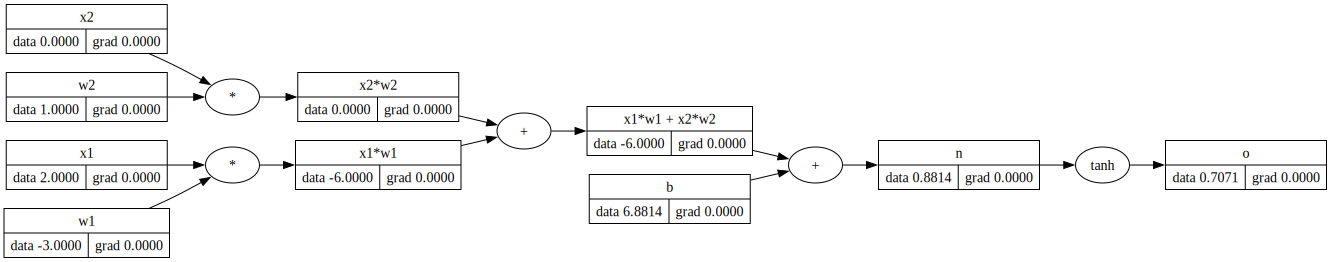

In [38]:
# RESTING THE GRADIENTS
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

o = n.tanh();o.label = 'o'

draw_dot(o)
# Initially all gradients are 0

In [39]:
o.backward()

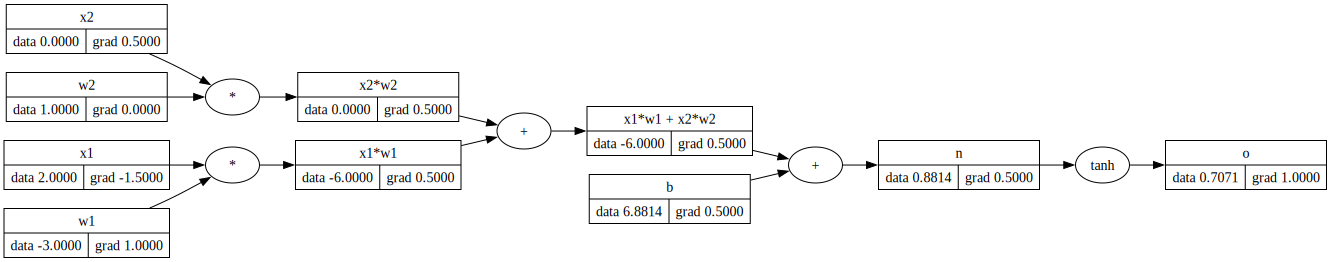

In [40]:
draw_dot(o)

## Hmmmm!!! THERE IS A BAD BUG IN THE CODE

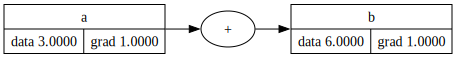

In [42]:
a = Value(3.0, label='a')
b = a + a ; b.label='b'
b.backward()
draw_dot(b)

In [ ]:
# The fwd pass works, we get correct value of b = 6
# But the gradient of a is not correct, it should have been 2

THis is because, inside __add__ in _backward()

# self.grad = 1.0 * out.grad
# other.grad = 1.0 * out.grad
# here self and other are same object (a) and these two lines would overwrite the gradient

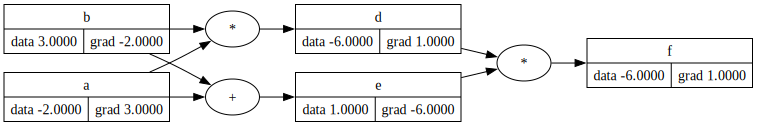

In [44]:
# another example of bug:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')

d = a* b; d.label = 'd'
e = a + b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f)

# the grad of b and a are wrong

In [ ]:
# we will run into this issue, if we use a variable more than once (here a is used in both d and e)
# so in backpropo, d writes a gradient into a and then e overwrites that gradient

In [45]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad #WE ACCUMULATE THE GRADIENTS
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


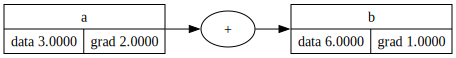

In [46]:
#NOW IT WORKS
a = Value(3.0, label='a')
b = a + a ; b.label='b'
b.backward()
draw_dot(b)

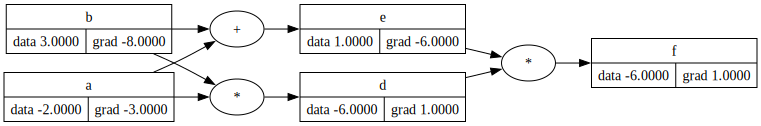

In [47]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')

d = a* b; d.label = 'd'
e = a + b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f)

In [ ]:
when e.backward called, it deposits its gradient into a (i.e -6*1)
and when d.backward called, it deposits and accumluates the gradeint in a (i.e 1*3)
so totaly we get -6+3 = -3 as the gradient for a

# WE NOW HAVE:

In [48]:
# Now we need to visualize the expression graph

from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'}) # LR = Left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, crteat a rectangular ('record') node for it
        dot.node(name = uid, label = "%s | {data %.4f | grad %.4f }"% (n.label,n.data, n.grad ), shape = 'record')

        if n._op:
            #if this value is a result of some operation, create an op node for it
            dot.node(name = uid+n._op, label = n._op)
            #and connect this node to it
            dot.edge(uid+n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)
    return dot

In [49]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad #WE ACCUMULATE THE GRADIENTS
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


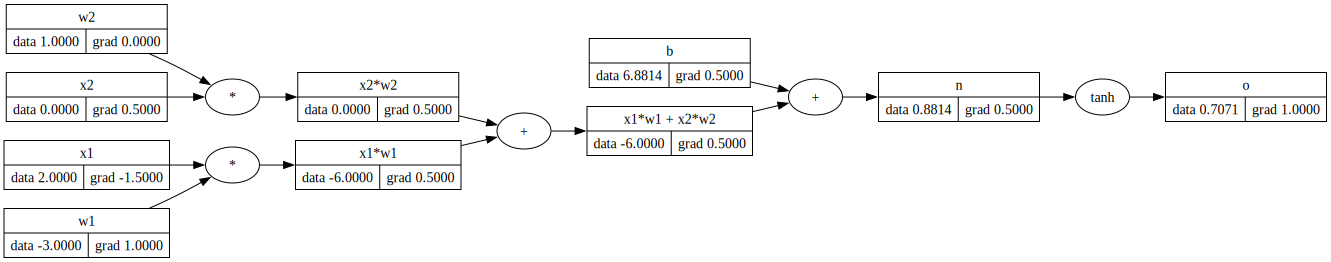

In [52]:
# RESTING THE GRADIENTS
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

o = n.tanh();o.label = 'o'
o.backward()
draw_dot(o)
# Initially all gradients are 0

## BREAKING TANH

In [ ]:
We can also break the tanh into explicit functions of x...right now we treat tanh as a single function
Now we will break tanh into explicit functions of x---> i.e use tanh(x) = (e^2x - 1)/(e^2x + 1)
REASONS:
1. To prove the values of gradients will remain same
2. The new formula requires additional operations like -, division, exponentiation etc.
    

In [53]:
a = Value(2.0)
a+1

# This fails because 1 is not a Value object and the func __add__ is defined on Value objects only
# we need to change this behaviour using the line: other = other if isinstance(other, Value) else Value(other)

AttributeError: 'int' object has no attribute 'data'

In [185]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad #WE ACCUMULATE THE GRADIENTS
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self,other):
        return self + other
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
        
    def __rmul__(self, other): # other * self   ---> USE OF RMUL
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad +=  other * (self.data**(other-1)) * out.grad#y= x^n so dy/dx = n * x^n-1 (power rule) 
        out._backward = _backward
        return out
        
    def __truediv__(self,other): #self / other
        return self * other**-1 #calls __pow__

    def __neg__(self): # -self
        return self * -1
        
    def __sub__(self, other): # self - other
        return self + (-other)
        
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x= self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad   #y = e^x, dy/dx (the local derivative) = e^x itself which is nothing but out.data
        out._backward = _backward
        return out
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo): # `Froom root to leaf i.e R to L
            node._backward()


In [58]:
a = Value(2.0)
a*2

Value(data=4.0)

In [63]:
a = Value(2.0)
2*a
# This wont work 
# a*2 python will internally call a.__mul__(2) and it would work
#  but 2*a , Python calls 2.__mul__(a), and errors out as 2.__mul__ doesnt understand Value
# To fix this, you can use rmul
#RMUL is a fallback, i.e if it cannot do 2*a, it checks if a*2 is possible and that will be called into __rmul__
# so 2*a redirects to rmul, and rmul will call a*2

Value(data=4.0)

In [86]:
#subtaction
a = Value(2.0)
b = Value(4.0)
a-b

Value(data=-2.0)

In [76]:
# Exp func
a=Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [79]:
# Divions
a = Value(2.0)
b = Value(4.0)
a/b

Value(data=0.5)

In [ ]:
 # Division can be redefined as
a / b
a * (1/b)
a * (b**-1)


so we now need to implement x**k and when k=-1 it is division

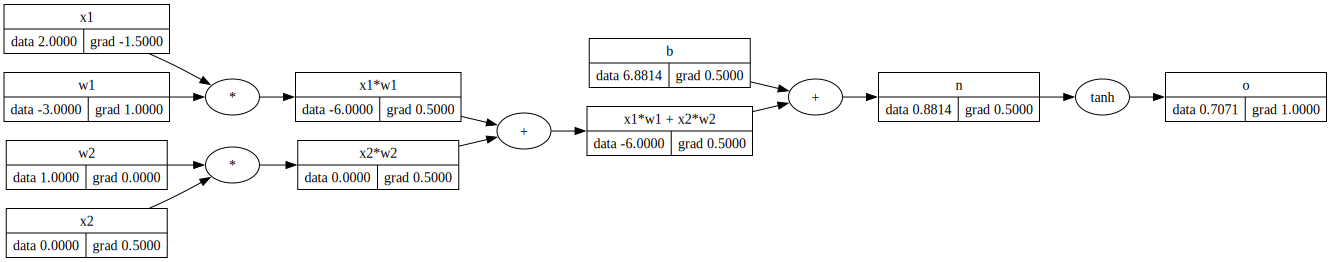

In [87]:
# RESTING THE GRADIENTS
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1,w2 of the neuron
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of nueron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# x1*w1 + x2*w2 + b

o = n.tanh();o.label = 'o'
o.backward()
draw_dot(o)
# Initially all gradients are 0

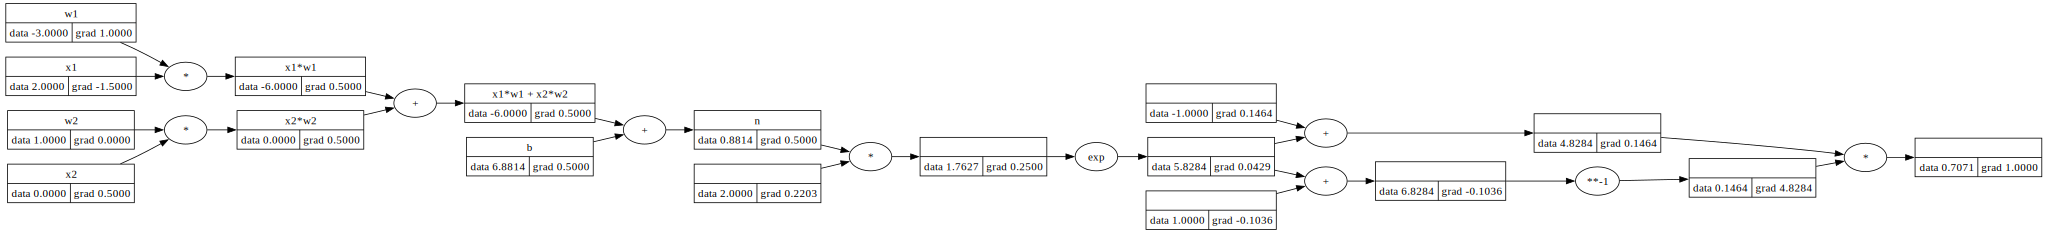

In [89]:
# BREAKING THE TANH
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;  x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp() #e^2x
o = (e-1)/(e+1)
o.backward()
draw_dot(o)
# Initially all gradients are 0

WE OBSERVE THAT THE GRAPH IS LONGER---> BECAUSE WE BROKE TANH IN TO MULKTIPLE FUNCTIONS

BUT NOTICE THAT THE VALUE OF O and the GRADIENTS AT LEAF NODES(w1,w2,x1,x2) WILL REMAIN THE SAME

 SO THE LEVEL YOU IMPLEMENT YOUR OPERATIONS IS UPTO YOU

IF YOU CAN FIND THE LOCAL GRADIENT, BACKPROP and FWD PASS willwork

## DOING THE SAME THING USING Pytorch

In [94]:
import torch

A tensor is basically a generalization of scalars, vectors, and matrices to potentially higher dimensions.

In [107]:
# casting the tensor to double bcoz Python use double precision for its floating point numbers
# Float type is single precision and double is double precision
x1 = torch.Tensor([2.0]).double()         ; x1.requires_grad = True  #we explicitly need to define these nodes need gradients
x2 = torch.Tensor([0.0]).double()         ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()         ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()         ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [106]:
torch.Tensor([2]).double().dtype

torch.float64

In [97]:
torch.tensor(5) #this calls a function and is used to create tensors from Vlaues
torch.Tensor(5) # this calls the Class constructor and behaves strange

tensor([0., 0., 0., 0., 0.])

In [102]:
print(torch.tensor(5).shape)
print(torch.Tensor([3]).shape)

torch.Size([])
torch.Size([1])


In [121]:
print(x2.item())
print(x2.grad.item())

0.0
0.5000001283844369


## NOW WE BUILD OUT A NEURAL NETWORK

In [ ]:
# We will build a 2 layer MLP (Multi Layer Perceptron)


In [322]:
import random
class Neuron:
    def __init__(self, nin): #nin = number of inputs to this neuron
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] #creates weights equal to number of inputs
        self.b = Value(random.uniform(-1,1))
        # print(self.w)
        
    def __call__(self,x):  #__call__ allows object of a class to be called like a function
        # w * x + b    
        # zip takes two iterators and creates a new iterator which iterates over the  tuples of the corres. entries 
        act = sum((wi*xi for wi, xi in zip(self.w,x)), self.b) #+ self.b #Sum starts addition with 0, so to rectify give Value(0.0)
        out =  act.tanh() #applying activation function
        return out

    def parameters(self):
        return self.w + [self.b]
        
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)] #This creates a fully connected layer

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # The above single line does the below 
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params
        
class MLP:
    def __init__(self, nin, nouts): # nouts is a list which defines the output size of each layers of our MLP
        sz = [nin]+nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))] #iterate over consecutive pairs

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [205]:
x = [2.0, 3.0, -1.0]
n = MLP(3,[4,4,1]) # 3 inputs, 4 neurons in 1st and 2nd H.L and 1 neuron in Output Layer
n(x)

Value(data=0.3352448328153738)

In [207]:
len(n.parameters())

41

In [208]:
12+12+16+16+4

60

In [152]:
draw_dot(n(x))

TypeError: unhashable type: 'list'

In [146]:
nin : 3 #input layer has 3 neurons
nout : [4,4,1] #first and second HL has 4 neurons and final layer has 1 neuron
sz : [3, 4, 4, 1]

In [150]:
a= [1,2,3]
len(a)

3

## Creating a simple dataset

In [209]:
#this dataset has 4 examples with 3 features (dimensions)
xs = [
    [2.0,3.0,-1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0],
]

ys = [1.0,-1.0,-1.0,1.0] #desired targets



In [308]:
#CELL A
#Current preditiction (without backpropo)
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9991880529249997),
 Value(data=-0.9998454372605993),
 Value(data=-0.9917163475943592),
 Value(data=0.999106033139191)]

In [309]:
# CELL B
# To make the predicitions we need to define a LOSS and then do backpropo
# here we implement a MSE Loss
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys,ypred)]) #ygt is y_ground_truth and yout is the predicted output
loss

Value(data=7.01012216187155e-05)

In [305]:
# CELL C
# Now we want to minimise the loss
loss.backward()

In [218]:
print(n.layers[0].neurons[0].w[0]) # FIrst weight(w1) of First neuron of first HL
print(n.layers[0].neurons[0].w[0].grad)
#as gradient is negative, it means if we increase the weight of this synapse of this neuron, this would decrease the LOSS


Value(data=-0.3821780746718997)
0.10686499784803578


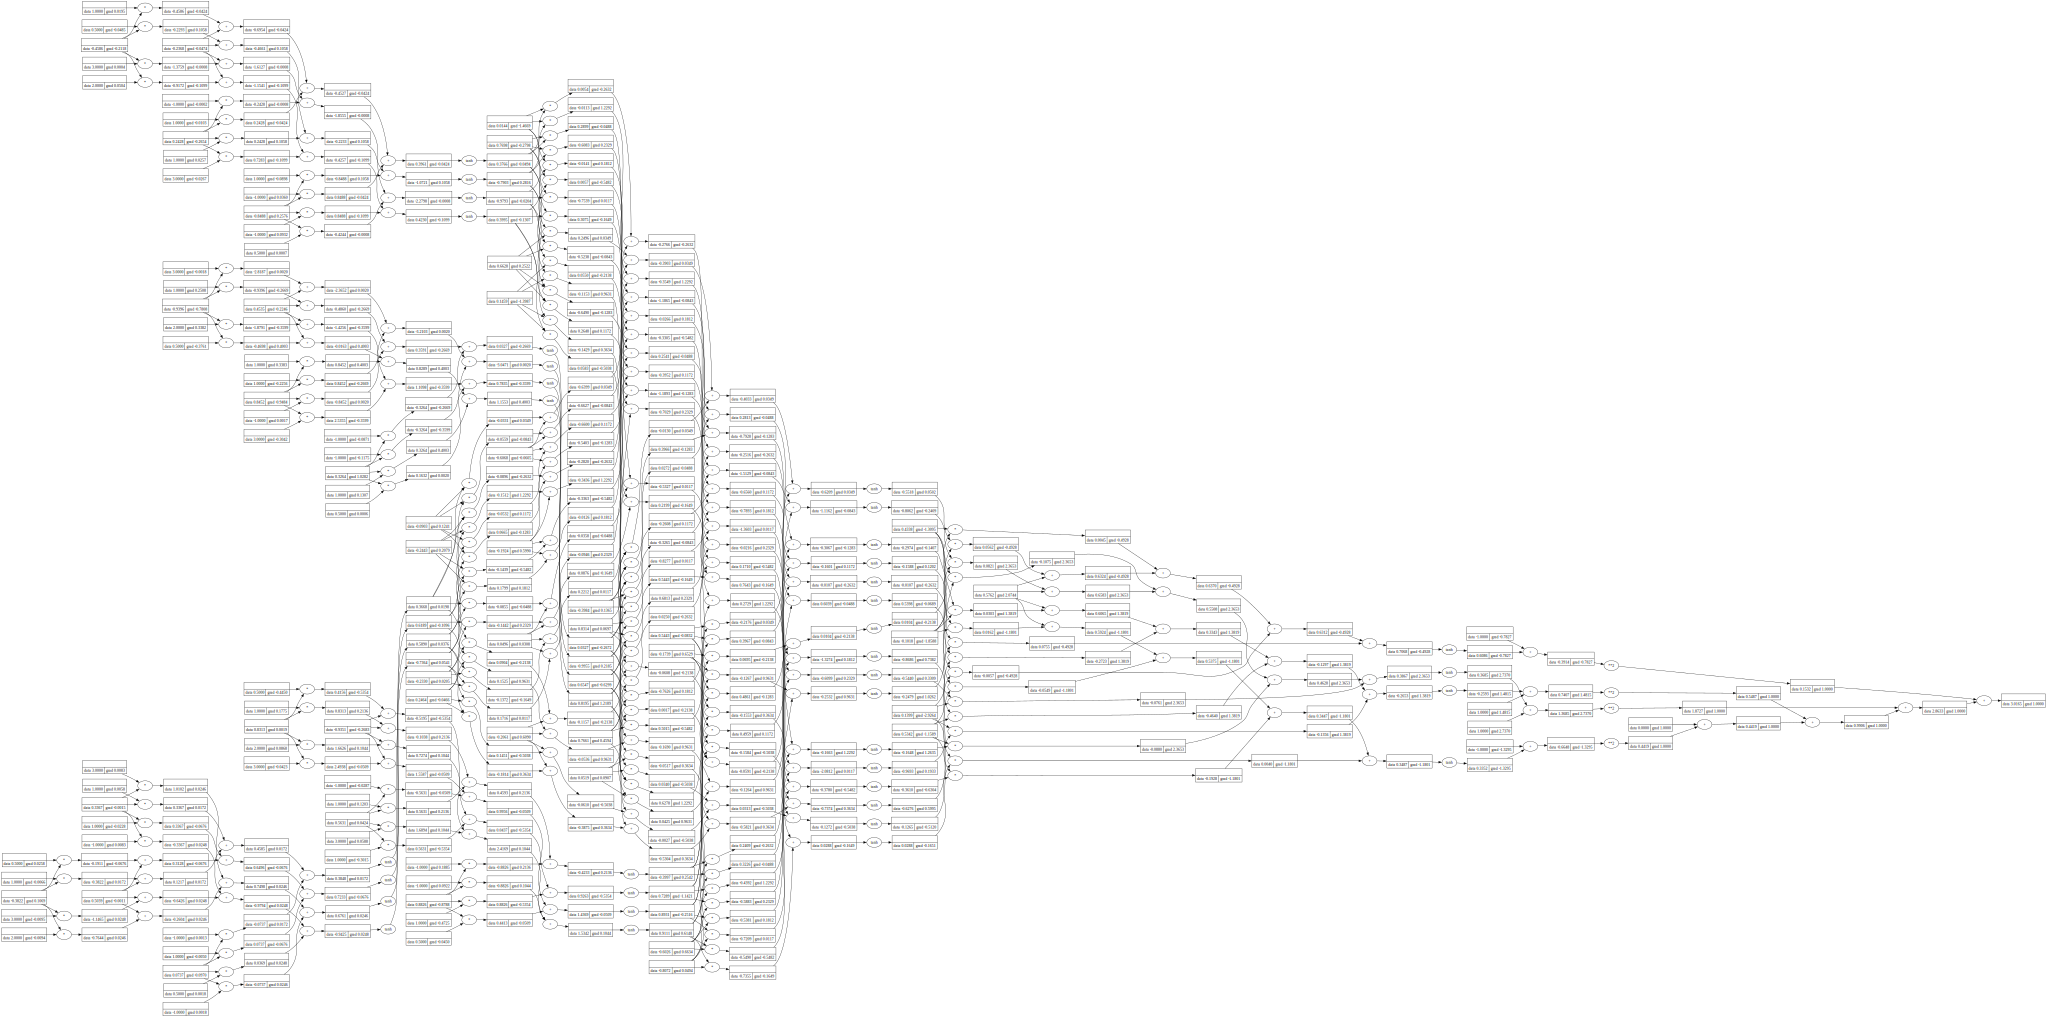

In [217]:
draw_dot(loss)
# Input data (xs) nodes also has gradients, but not useful for us as input data shouldn;t be changed
# There are grads for NN parameters: wieghts and biases----> So we use backpropo to change weights and biases to decrease LOSS


In [ ]:
# We need a function to collect all para of the NN and nudge them tiny to decrease the LOSS
# This function is called parameters() is class Neuron

In [306]:
# CELL D
for p in n.parameters():
    # gradient gives the rate of change of LOSS w.r.t params
    # So we move the params to the opposite direction of gradient
    # For eg: assume gradient of a nueron is -ve, this means if we decrease the weight, the LOSS will increase
    # Opposite of gradient(i.e if wee increase weight), LOSS will decrease
    # another perspective: the gradient vector(the vector of all gradients) points to the direction of increasing the loss, but we want to 
    #decrease the loss
    p.data += -0.01 * p.grad
    # the 0.01 here is the learning rate which is very crucial....DO NOT OVERSTEP

In [307]:
# CELL E
print(n.layers[0].neurons[0].w[0]) # FIrst weight(w1) of First neuron of first HL
print(n.layers[0].neurons[0].w[0].grad)

Value(data=-0.5591219898570055)
1.4439723498183725


In [271]:
# Doing gradient descent manually by running cell A,B,C,D,E in that order mukltiple times

In [310]:
n.parameters()

[Value(data=-0.5591219898570055),
 Value(data=0.14842687675765087),
 Value(data=0.24204969836512413),
 Value(data=0.4707372590789547),
 Value(data=0.1431599807277824),
 Value(data=1.0494093953028298),
 Value(data=-1.4656382344925027),
 Value(data=-0.07246037980844239),
 Value(data=-0.406718473097142),
 Value(data=1.483788789824691),
 Value(data=-0.39548606995585744),
 Value(data=0.5887259773420492),
 Value(data=0.4948978405048475),
 Value(data=0.1558178706121032),
 Value(data=1.6581204785756822),
 Value(data=-0.8817107811400089),
 Value(data=-0.07753095467585579),
 Value(data=0.7192504999447737),
 Value(data=-0.345496649777591),
 Value(data=0.6126264140431351),
 Value(data=-0.5119031850407891),
 Value(data=0.3484532064400916),
 Value(data=1.3352315847447307),
 Value(data=0.21766852767846995),
 Value(data=-0.32338686319844356),
 Value(data=-0.1938007182118089),
 Value(data=-0.2525765977321908),
 Value(data=1.2782810708682555),
 Value(data=0.7751846210150464),
 Value(data=-0.756741174164

In [338]:

xs = [
    [2.0,3.0,-1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0],
]

ys = [1.0,-1.0,-1.0,1.0] 
n = MLP(3,[4,4,1])

In [416]:
# FULL TRAINING COMBINED
 
for k in range(20): # 20 epochs
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys,ypred)])


    # after each update, we need to set all grads to 0 or else it keeps on adding to previous grads
    for p in n.parameters():
        p.grad = 0.0
    loss.backward() #bwd pass

    #update
    for p in n.parameters():
        p.data += -0.05 *  p.grad

    print(k, loss.data)

0 0.0004766261592040865
1 0.00047625715821619406
2 0.00047588872108145344
3 0.0004755208465148155
4 0.0004751535332351328
5 0.0004747867799651292
6 0.0004744205854313917
7 0.0004740549483643568
8 0.000473689867498289
9 0.0004733253415712801
10 0.0004729613693252056
11 0.00047259794950575685
12 0.0004722350808623811
13 0.0004718727621482886
14 0.000471510992120451
15 0.00047114976953955775
16 0.00047078909317002106
17 0.00047042896177995505
18 0.0004700693741411813
19 0.0004697103290291732


In [418]:
ypred

[Value(data=0.9919261689953166),
 Value(data=-0.9887883483709848),
 Value(data=-0.9896014782945486),
 Value(data=0.9869350393790167)]

In [320]:
ys

[1.0, -1.0, -1.0, 1.0]